In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv("tmdb_clean_Di_V2.csv").drop(columns=["revenue"])
df.head(5)


,Success,budget,genres,keywords,popularity,production_companies,release_date,runtime,vote_average,vote_count,...,productions_double A Films,productions_icon,productions_nWave Pictures,productions_platinum studios,productions_thefyzz,productions_thinkfilm,productions_uFilm,productions_unafilm,productions_warner bross Turkey,productions_Österreichischer Rundfunk (ORF)
0,1,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",12/10/2009,162,7.2,11800,...,0,0,0,0,0,0,0,0,0,0
1,1,300000000,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",5/19/2007,169,6.9,4500,...,0,0,0,0,0,0,0,0,0,0
2,1,245000000,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...",107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",10/26/2015,148,6.3,4466,...,0,0,0,0,0,0,0,0,0,0
3,1,250000000,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...",112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",7/16/2012,165,7.6,9106,...,0,0,0,0,0,0,0,0,0,0
4,0,260000000,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...",43.926995,['Walt Disney Pictures'],3/7/2012,132,6.1,2124,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop(columns=["genres", "keywords", "production_companies", "release_date"])

In [5]:
df.shape

(3764, 4216)

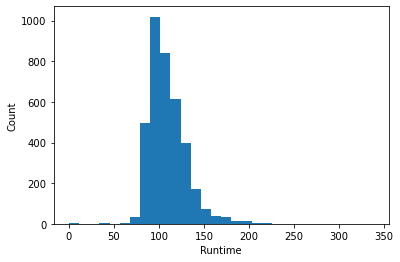

In [6]:
plt.hist(df.runtime,bins=30)
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.show()

In [7]:
#split the data with 80% for trainnig data and 20% for testing data.

y = df["Success"]
x = df.drop("Success",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (3011, 4215) (3011,)
Test (753, 4215) (753,)


## RandomForestClassifier

In [8]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)

In [9]:
print("training error is ",1- metrics.accuracy_score(y_train, y_pred))

training error is  0.0


In [10]:
y_pred_test=clf.predict(x_test)
print("training error is ",1- metrics.accuracy_score(y_test, y_pred_test))

training error is  0.20849933598937587


In [11]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp[:20]

vote_count                                            0.116551
popularity                                            0.099317
vote_average                                          0.075545
budget                                                0.063336
runtime                                               0.049235
genres_Comedy                                         0.009730
genres_Drama                                          0.009585
genres_Action                                         0.008796
genres_Romance                                        0.008145
genres_Thriller                                       0.008060
genres_Adventure                                      0.007803
genres_Science Fiction                                0.007327
genres_Crime                                          0.006972
genres_Fantasy                                        0.006931
productions_Universal Pictures                        0.006898
productions_Paramount Pictures                        0

<BarContainer object of 25 artists>

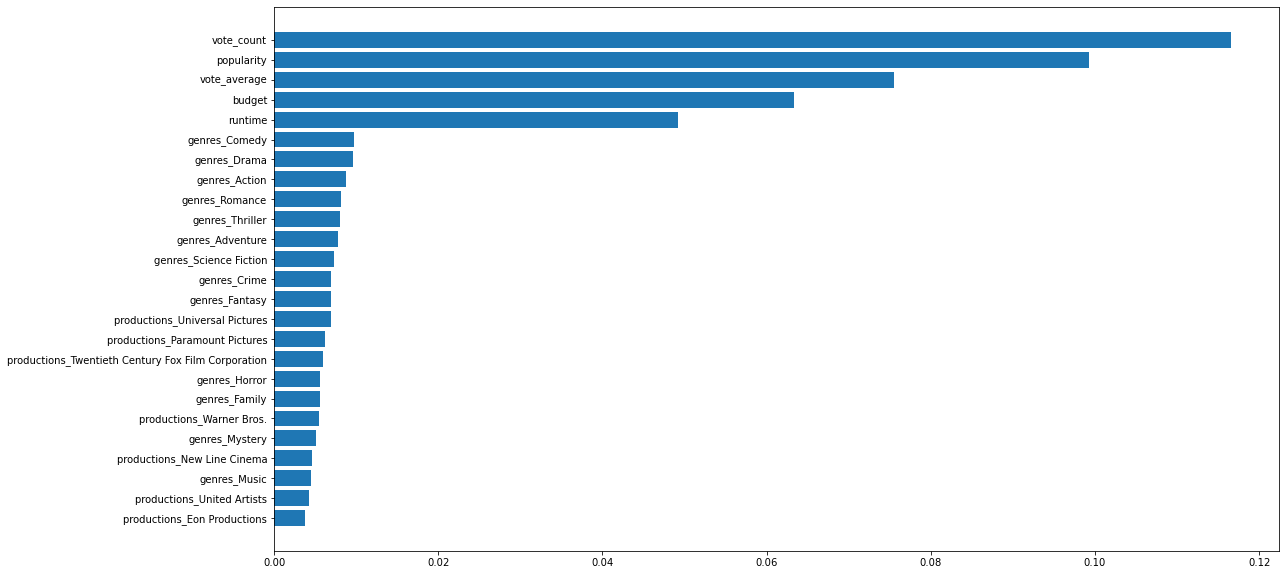

In [35]:

plt.subplots(figsize=(18,10))
plt.barh(top_25_features[::-1], feature_imp[:25][::-1])

In [32]:
top_25_features[::-1]

['productions_Eon Productions',
 'productions_United Artists',
 'genres_Music',
 'productions_New Line Cinema',
 'genres_Mystery',
 'productions_Warner Bros.',
 'genres_Family',
 'genres_Horror',
 'productions_Twentieth Century Fox Film Corporation',
 'productions_Paramount Pictures',
 'productions_Universal Pictures',
 'genres_Fantasy',
 'genres_Crime',
 'genres_Science Fiction',
 'genres_Adventure',
 'genres_Thriller',
 'genres_Romance',
 'genres_Action',
 'genres_Drama',
 'genres_Comedy',
 'runtime',
 'budget',
 'vote_average',
 'popularity',
 'vote_count']

(0.0, 0.15)

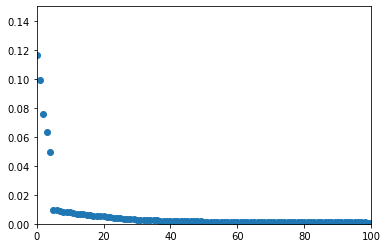

In [37]:
plt.scatter(range(x_train.shape[1]), feature_imp)
plt.xlim(0,100)
plt.ylim(0,0.15)

In [13]:
top_25_features = list(feature_imp[:25].index)
top_25_features

['vote_count',
 'popularity',
 'vote_average',
 'budget',
 'runtime',
 'genres_Comedy',
 'genres_Drama',
 'genres_Action',
 'genres_Romance',
 'genres_Thriller',
 'genres_Adventure',
 'genres_Science Fiction',
 'genres_Crime',
 'genres_Fantasy',
 'productions_Universal Pictures',
 'productions_Paramount Pictures',
 'productions_Twentieth Century Fox Film Corporation',
 'genres_Horror',
 'genres_Family',
 'productions_Warner Bros.',
 'genres_Mystery',
 'productions_New Line Cinema',
 'genres_Music',
 'productions_United Artists',
 'productions_Eon Productions']

In [14]:
x_train_sub = x_train[top_25_features]
x_test_sub = x_test[top_25_features]

In [15]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
grid_rf = {'n_estimators': [150,200],
 'max_features': range(1,5), 
 'min_samples_leaf': [0.5,1,2],
 'min_samples_split': range(2, 5)}

In [17]:
rfc = RandomForestClassifier()
gs_rf = GridSearchCV(rfc, grid_rf, cv=3, n_jobs=-1)

In [18]:
gs_rf.fit(x_train_sub, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': range(1, 5),
                         'min_samples_leaf': [0.5, 1, 2],
                         'min_samples_split': range(2, 5),
                         'n_estimators': [150, 200]})

In [19]:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

Best accuracy: 0.787

Best params:
 {'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [21]:
y_sub_pred_train=gs_rf.predict(x_train_sub)
print("training error is ",1- metrics.accuracy_score(y_train, y_sub_pred_train))

training error is  0.0


In [20]:
y_sub_pred_test=gs_rf.predict(x_test_sub)
print("testing error is ",1- metrics.accuracy_score(y_test, y_sub_pred_test))

testing error is  0.2071713147410359


## GradientBoostingClassifier

In [22]:
gradient_booster = GradientBoostingClassifier()
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
gradient_booster.fit(x_train_sub,y_train)
print(metrics.classification_report(y_test,gradient_booster.predict(x_test_sub)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       531
           1       0.67      0.63      0.65       222

    accuracy                           0.80       753
   macro avg       0.76      0.75      0.75       753
weighted avg       0.80      0.80      0.80       753



In [24]:
gbc = GradientBoostingClassifier()
parameters = {
 "n_estimators":[150,200],
 "max_depth":[7,8],
 "learning_rate":[0.45,0.5,0.6]
}

In [25]:
gs_gbc = GridSearchCV(gbc, parameters, cv=3)
gs_gbc.fit(x_train_sub, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.45, 0.5, 0.6], 'max_depth': [7, 8],
                         'n_estimators': [150, 200]})

In [26]:
print('Best accuracy: %.3f' % gs_gbc.best_score_)
print('\nBest params:\n', gs_gbc.best_params_)


Best accuracy: 0.783

Best params:
 {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}


In [28]:
y_sub_pred_train=gs_gbc.predict(x_train_sub)
print("training error is ",1- metrics.accuracy_score(y_train, y_sub_pred_train))

training error is  0.0


In [27]:
y_sub_pred_test=gs_gbc.predict(x_test_sub)
print("testing error is ",1- metrics.accuracy_score(y_test, y_sub_pred_test))

testing error is  0.22045152722443562


In [51]:
gbc_feature = list(zip(x_train_sub.columns, gs_gbc.best_estimator_.feature_importances_))
gbc_feature = sorted(gbc_feature, key = lambda x: x[1], reverse=True) 
gbc_feature

[('vote_count', 0.377759930929999),
 ('budget', 0.18576281759784732),
 ('runtime', 0.10857972151794422),
 ('popularity', 0.09471978000935614),
 ('vote_average', 0.07912055885544857),
 ('genres_Drama', 0.013264822767673556),
 ('genres_Science Fiction', 0.012005694612153207),
 ('genres_Thriller', 0.011015185481864675),
 ('genres_Family', 0.01083145233225434),
 ('genres_Music', 0.009704697708682515),
 ('productions_Paramount Pictures', 0.009053622674207527),
 ('productions_Twentieth Century Fox Film Corporation', 0.008914436835454353),
 ('genres_Comedy', 0.008893084039114424),
 ('genres_Fantasy', 0.008417552763261815),
 ('genres_Crime', 0.008074279964676757),
 ('productions_New Line Cinema', 0.007355020996046569),
 ('genres_Romance', 0.007272028623921858),
 ('productions_Warner Bros.', 0.0071866967069745035),
 ('genres_Adventure', 0.006099714960750007),
 ('genres_Horror', 0.005445212202321668),
 ('productions_Eon Productions', 0.005353810785653468),
 ('productions_Universal Pictures', 0.0

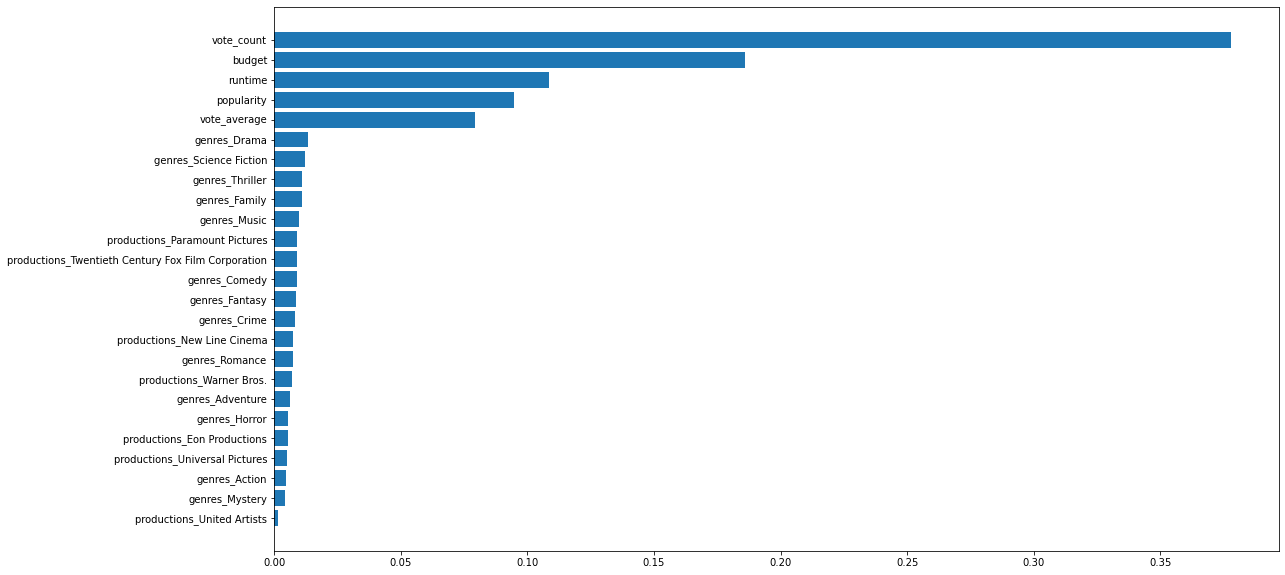

In [59]:
name = [i[0] for i in gbc_feature]
score = [i[1] for i in gbc_feature]


plt.subplots(figsize=(18,10)) 
plt.barh(name[::-1], score[::-1],align='center')
plt.show()

In [ ]:

plt.subplots(figsize=(18,10))
plt.barh(top_25_features[::-1], feature_imp[:25][::-1])